# Model Selection and Evaluation
* 1 Cross-validation: evaluating estimator performance
* 2 Tuning the hyper-parameters of an estimator
* 3 Model evaluation: quantifying the quality of predictions
* 4 Model persistence
* 5 Validation curves: plotting scores to evaluate models

## 三、Model evaluation: quantifying the quality of predictions

* There are 3 different approaches to evaluate the quality of predictions of a model:
> 1. Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.
> 2. Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.
> 3. Metric functions: The metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.
* Finally, Dummy estimators are useful to get a baseline value of those metrics for random predictions.

### 1 The scoring parameter: defining model evaluation rules

#### 1.1 Common cases: predefined values

* For the most common use cases, you can designate a scorer object with the scoring parameter

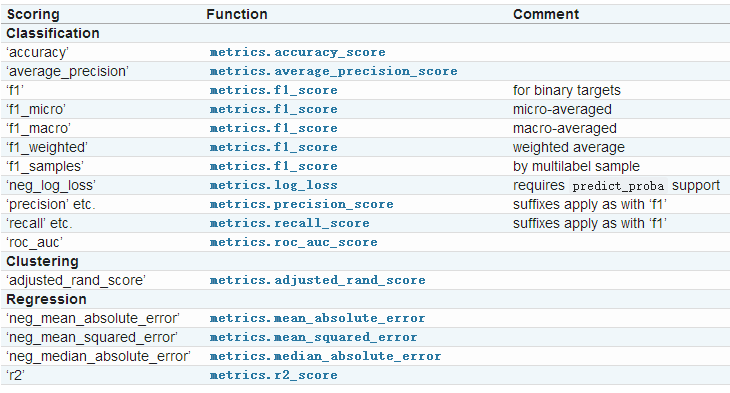

In [2]:
from IPython.display import Image
Image(filename="py35_picture\Scoring Parameter.png")

In [4]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(probability=True, random_state=0)
cross_val_score(clf, X, y, scoring='neg_log_loss') 

model = svm.SVC()
cross_val_score(model, X, y, scoring='accuracy')

array([ 0.98039216,  0.96078431,  0.97916667])

#### 1.2 Defining your scoring strategy from metric functions

In [5]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]}, scoring=ftwo_scorer)

In [6]:
import numpy as np
def my_custom_loss_func(ground_truth, predictions):
    diff = np.abs(ground_truth - predictions).max()
    return np.log(1 + diff)

# loss_func will negate the return value of my_custom_loss_func,
#  which will be np.log(2), 0.693, given the values for ground_truth
#  and predictions defined below.
loss  = make_scorer(my_custom_loss_func, greater_is_better=False)
score = make_scorer(my_custom_loss_func, greater_is_better=True)
ground_truth = [[1, 1]]
predictions  = [0, 1]
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(ground_truth, predictions)
loss(clf,ground_truth, predictions) 

score(clf,ground_truth, predictions) 

0.69314718055994529

#### 1.3 Implementing your own scoring object

### 2 Classification metrics

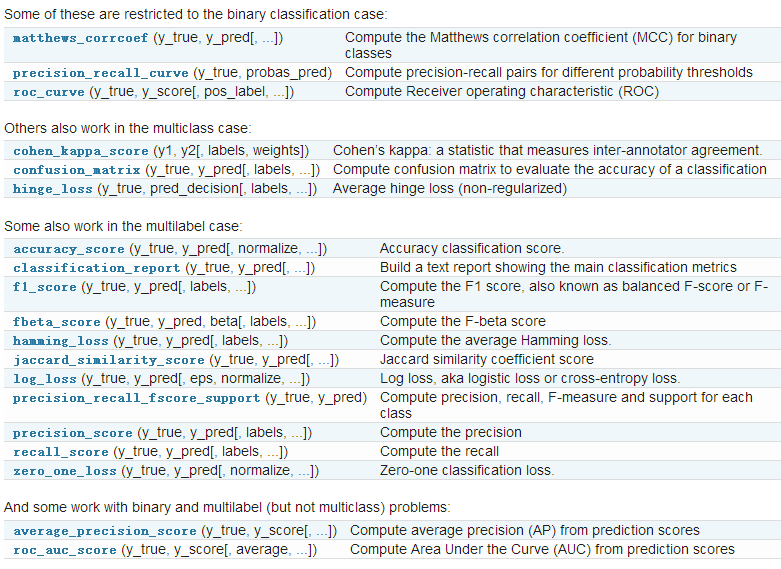

In [7]:
Image(filename="py35_picture\Classification metrics.png")

#### 2.1 From binary to multiclass and multilabel

#### 2.2 Accuracy score

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

accuracy_score(y_true, y_pred, normalize=False)

2

In [9]:
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.5

#### 2.3 Cohen’s kappa

In [10]:
from sklearn.metrics import cohen_kappa_score
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)

0.4285714285714286

#### 2.4 Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [12]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

#### 2.5 Classification report

#### 2.6 Hamming loss

#### 2.7 Jaccard similarity coefficient score

#### 2.8 Precision, recall and F-measures

#### 2.9 Hinge loss

#### 2.10 Log loss

#### 2.11 Matthews correlation coefficient

#### 2.12 Receiver operating characteristic (ROC)

#### 2.13 Zero one loss

#### 2.14 Brier score loss

### 3 Multilabel ranking metrics

#### 3.1 Coverage error

#### 3.2 Label ranking average precision

#### 3.3 Ranking loss

### 4 Regression metrics

#### 4.1 Explained variance score

#### 4.2 Mean absolute error

#### 4.3 Mean squared error

#### 4.4 Median absolute error

#### 4.5 R² score, the coefficient of determination

### 5 Clustering metrics

### 6 Dummy estimators